<a href="https://colab.research.google.com/github/syeong1218/python/blob/master/Lorenz_Equation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lorenz 방정식 풀이

**Lorenz equation**

로렌즈 방정식은 $x(t),y(t),z(t)$ 세 변수에 대한 1차 비선형 연립 상미분 방정식이다.

 세 개의 매개변수 $\sigma, \rho, \beta$ 에 의존한다.

$${\displaystyle {\dot {x}}=\sigma (y-x)}\\
{\displaystyle {\dot {y}}=x(\rho -z)-y}\\
{\displaystyle {\dot {z}}=xy-\beta z}$$

로렌즈 논문에서 사용한 매개변수 값들은 다음과 같다.

$$\sigma=10, \: \beta=\frac{8}{3}, \: \rho=28 $$

**scipy.integrate.solve_ivp**

scipy.integrate.solve_ivp(fun, t_span, y0, method='RK45', t_eval=None, dense_output=False, events=None, vectorized=False, **options)
```
dy/dt = f(t,y)
y(t0) = y0
```
- fun : fun(t,y)
- t_span : (t0, tf), t=t0부터 t=tf까지 적분
- y0 : 초기값

In [0]:
import numpy as np
from scipy.integrate import solve_ivp
import sympy
import matplotlib.pyplot as plt
import matplotlib as mpl

In [0]:
def lorenz(t, xyz):
    x, y, z = xyz
    return [sigma * (y - x),
            x * (rho - z) - y,
            x * y - beta * z]

In [0]:
xyz0 = [1.0, 1.0, 1.0]
t = (0,25)

In [0]:
rho, sigma, beta = 28, 8, 8/3.0

xyz1 = solve_ivp(lorenz, t, xyz0, t_eval=np.linspace(0,25,10000))

In [0]:
rho, sigma, beta = rho, sigma, 0.6*beta

xyz2 = solve_ivp(lorenz, t, xyz0,t_eval=np.linspace(0,25,10000))

In [0]:
rho, sigma, beta = rho, 2*sigma, 0.6*beta

xyz3 = solve_ivp(lorenz, t, xyz0,t_eval=np.linspace(0,25,10000))

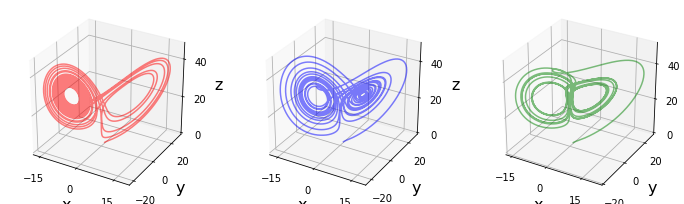

In [12]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3.5), subplot_kw={'projection': '3d'})

for ax, xyz, c in [(ax1, xyz1, 'r'), (ax2, xyz2, 'b'), (ax3, xyz3, 'g')]:
    ax.plot(xyz.y[0], xyz.y[1], xyz.y[2], c, alpha=0.5)
    ax.set_xlabel('x', fontsize=16)
    ax.set_ylabel('y', fontsize=16)
    ax.set_zlabel('z', fontsize=16)
    ax.set_xticks([-15, 0, 15])
    ax.set_yticks([-20, 0, 20])
    ax.set_zticks([0, 20, 40])